In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012.csv


In [ ]:
import pandas as pd
df=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
print(df.head())


         STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          23     

In [ ]:
print(df.columns)

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')


In [ ]:
df.tail

<bound method NDFrame.tail of             STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9013     LAKSHADWEEP          TOTAL  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9016      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50               0   
1                                             1    23               0   
2                                             2    27               0   
3                                             1    20               0   
4                                             1    23               0   
...                                         ...   ...             ...   
9012                                          0     0               0   
9013                                          0     0               0   
9014                                          2     6               0   
9015                                         10     7               0   
9016                                         12    13               0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0             50                      46  ...     30                1131   
1             23                      53  ...     69                1543   
2             27                      59  ...     38                2088   
3             20                      25  ...     23                 795   
4             23                      49  ...     41                1244   
...          ...                     ...  ...    ...                 ...   
9012           0                       0  ...      3                   3   
9013           0                       0  ...      3                   3   
9014           6                       2  ...      1                 186   
9015           7                      17  ...     20                 632   
9016          13                      19  ...     21                 818   

      DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
9012             0                                                  1     
9013             0                                                  1     
9014             0                                                  2     
9015             0                                                  7     
9016             0                                                  9     

      INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
print("Unique States/UT:\n",df['STATE/UT'].unique())

Unique States/UT:
 ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY']


In [ ]:
print("Missing values before Cleaning:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("Missing values after Cleaning:")
print(df.isnull().sum())

Missing values before Cleaning:
STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0

In [ ]:
# prompt: rename columns for consistency

df.rename(columns={'STATE/UT': 'State/UT', 'DISTRICT': 'District'}, inplace=True)


In [ ]:
df['State/UT']=df['State/UT'].str.strip()
df['State/UT']

,State/UT
0,ANDHRA PRADESH
1,ANDHRA PRADESH
2,ANDHRA PRADESH
3,ANDHRA PRADESH
4,ANDHRA PRADESH
...,...
9012,LAKSHADWEEP
9013,LAKSHADWEEP
9014,PUDUCHERRY
9015,PUDUCHERRY


In [ ]:
# prompt: normalize state names

df['State/UT'] = df['State/UT'].replace(['A & N Islands'], 'Andaman & Nicobar Islands')
# df['State/UT'] = df['State/UT'].replace(['D & N Haveli'], 'Dadra & Nagar Haveli')
# df['State/UT'] = df['State/UT'].replace(['Daman & Diu'], 'Daman and Diu')

In [ ]:
# prompt: remove duplicates

df.drop_duplicates(inplace=True)

In [ ]:
# Once you have confirmed the column names, update the list below to match
df_filtered = df[['State/UT','YEAR', 'MURDER']]
df_filtered

,State/UT,YEAR,MURDER
0,ANDHRA PRADESH,2001,101
1,ANDHRA PRADESH,2001,151
2,ANDHRA PRADESH,2001,101
3,ANDHRA PRADESH,2001,80
4,ANDHRA PRADESH,2001,82
...,...,...,...
9012,LAKSHADWEEP,2012,0
9013,LAKSHADWEEP,2012,0
9014,PUDUCHERRY,2012,5
9015,PUDUCHERRY,2012,24


In [ ]:
df.tail(100)

,State/UT,District,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
8917,UTTAR PRADESH,MIRZAPUR,2012,27,3,8,4,0,4,7,...,3,85,24,3,0,29,0,76,369,775
8918,UTTAR PRADESH,MORADABAD,2012,90,84,14,36,0,36,162,...,0,88,28,72,3,255,0,218,1247,3652
8919,UTTAR PRADESH,MUZAFFARNAGAR,2012,126,134,21,27,0,27,217,...,1,28,16,38,0,225,0,201,1601,3715
8920,UTTAR PRADESH,PANCHSHIL NAGAR,2012,56,68,14,15,0,15,65,...,0,35,17,22,0,56,0,178,636,1765
8921,UTTAR PRADESH,PILIBHIT,2012,47,21,6,10,0,10,65,...,0,1,25,15,0,79,0,92,1645,2296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [ ]:
# prompt: check highest crime and in which state

# Group by State/UT and sum the 'MURDER' column
Crime_count = df_filtered.groupby(['State/UT' , 'YEAR'])['MURDER'].sum().reset_index()
Crime_count

,State/UT,YEAR,MURDER
0,A & N ISLANDS,2001,26
1,A & N ISLANDS,2002,34
2,A & N ISLANDS,2003,42
3,A & N ISLANDS,2004,30
4,A & N ISLANDS,2005,28
...,...,...,...
415,WEST BENGAL,2008,3622
416,WEST BENGAL,2009,4136
417,WEST BENGAL,2010,4796
418,WEST BENGAL,2011,4218


In [ ]:
state_crime_rate=Crime_count.groupby('State/UT')['MURDER'].sum().reset_index()
state_crime_rate

,State/UT,MURDER
0,A & N ISLANDS,320
1,ANDHRA PRADESH,63512
2,ARUNACHAL PRADESH,1682
3,ASSAM,30864
4,BIHAR,82490
5,CHANDIGARH,486
6,CHHATTISGARH,24120
7,D & N HAVELI,216
8,DAMAN & DIU,136
9,DELHI UT,12410


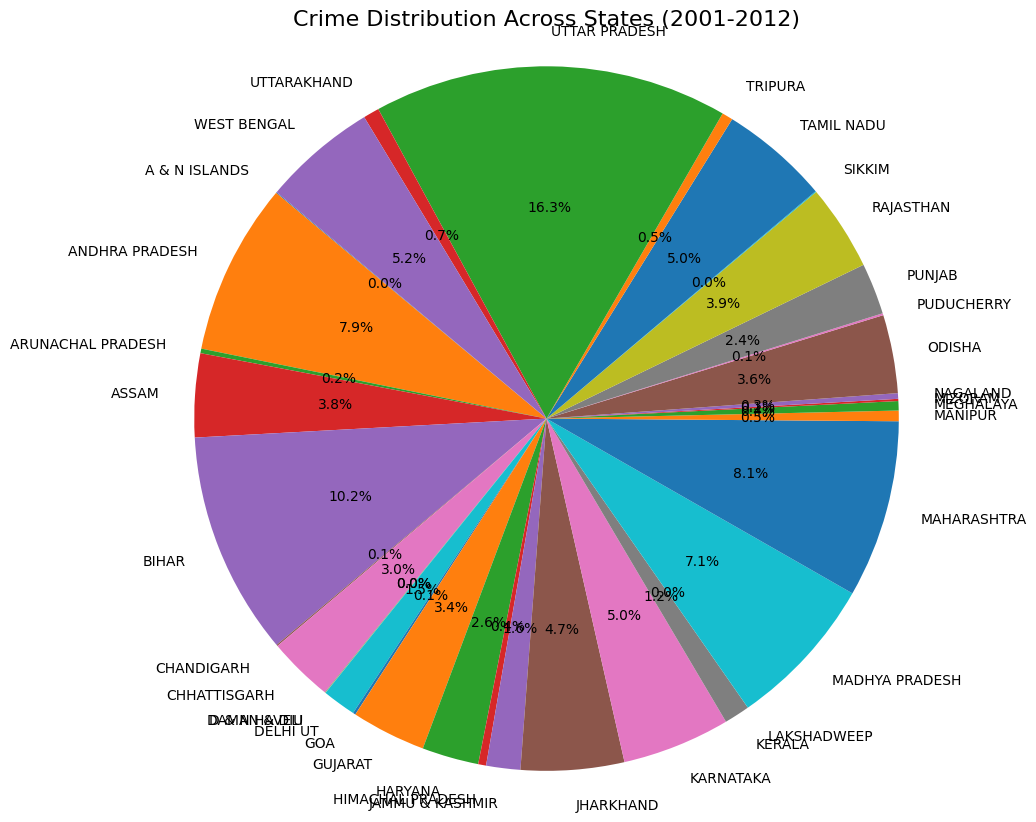

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.pie(state_crime_rate['MURDER'], labels=state_crime_rate['State/UT'], autopct='%1.1f%%', startangle=140)
plt.title('Crime Distribution Across States (2001-2012)',fontsize=16)
plt.axis('equal')
plt.show()